# NMF3D

### Tridimensional Normal Mode Functions

##### About the software:
 - NMF3D includes a Python and a Matlab version
 - works with both Python 2 and 3
 - for the Python version, Numpy and Scipy are required; netCDF4 is recommended

##### References:
 - A. Kasahara (1984). The Linear Response of a Stratified Global Atmosphere to
  Tropical Thermal Forcing, J. Atmos. Sci., 41(14). 2217--2237.
  doi: 10.1175/1520-0469(1984)041<2217:TLROAS>2.0.CO;2
  
  
 - P. N. Swarztrauber and A. Kasahara (1985). The vector harmonic analysis of Laplace's tidal equations, SIAM J. Sci. Stat. Comput, 6(2), 464-491. doi: 10.1137/0906033
 

 - A. Kasahara (1976). Normal modes of ultralong waves in the atmosphere, Mon. Weather Rev., 104(6), 669-690. doi: 10.1175/1520-0493(1976)104<0669:NMOUWI>2.0.CO;2


 - Y. Shigehisa (1983). Normal Modes of the Shallow Water Equations for Zonal Wavenumber Zero,
 J. Meteorol. Soc. Jpn., 61(4), 479-493. doi: 10.2151/jmsj1965.61.4_479


 - A. Kasahara (1978). Further Studies on a Spectral Model of the Global Barotropic Primitive Equations with Hough Harmonic Expansions, J. Atmos. Sci., 35(11), 2043-2051. doi: 10.1175/1520-0469(1978)035<2043:FSOASM>2.0.CO;2

### 1. Vertical space/time mean profile of temperature from a global dataset
*nmf3d.calcs.profile*

The mean profile of temperature is needed for the NMF3D. Folder data (nmf3d.datafolder)
contains some ERA-INTERIM temperature files that can be used. These are very low space/time
resolution files just for testing.

In [1]:
import nmf3d
f=nmf3d.datafolder+'/T*.nc*'

import os, glob
files=glob.glob(f)
files.sort()
for f in files:
    print('%s %.1fMb'%(os.path.basename(f),os.stat(f).st_size/1024**2))

T_01_1978_.nc4 1.4Mb
T_08_1978_.nc4 1.3Mb


 The profile can be calculated with the function nmf3d.calc.profile which returns the temperature (K) and pressure (Pa).

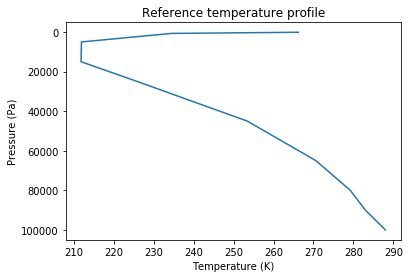

In [2]:
t,lev_mb=nmf3d.calcs.profile(files,quiet=1)
lev=lev_mb*100 # Pa
%matplotlib inline
import pylab as pl
pl.plot(t,lev)
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)')
pl.title('Reference temperature profile')
pl.gca().invert_yaxis()

In order to be used with other datasets, nmf3d.calcs.profile accepts as input arguments
the names of the variables to load (lon, lat, pressure and temperature). The lon and lat
can also be refined with splines using the option xmeth and ymeth. Ex.:

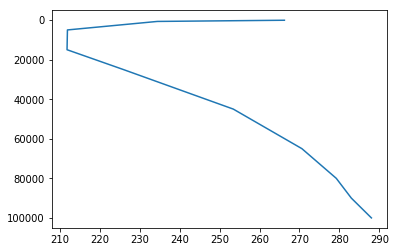

In [3]:
t,lev_mb=nmf3d.calcs.profile(files,xname='longitude',xmeth='spline',quiet=1)
lev=lev_mb*100
pl.plot(t,lev)
pl.gca().invert_yaxis()

nmf3d.datafolder includes a more realistic reference temperature profile (30 years of ERA Interim data with spatial
resolution of 1.5):

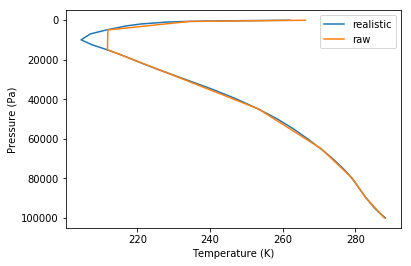

In [4]:
f=nmf3d.datafolder+'/T_ERA_I_1979_2010.txt'
import numpy as np
T,Lev=np.loadtxt(f)
pl.plot(T,Lev,label='realistic')
pl.plot(t,lev,label='raw')
pl.legend()
pl.gca().invert_yaxis()
pl.ylabel('Pressure (Pa)')
pl.xlabel('Temperature (K)');

### 2. Vertical structure equation
*nmf3d.vertical_structure.vse*

The vertical structure is calculated from a reference temperature profile
(temperature and the corresponding pressure levels, see above).

saving out_vs_ws0False.nc
saving out_vs_ws0True.nc


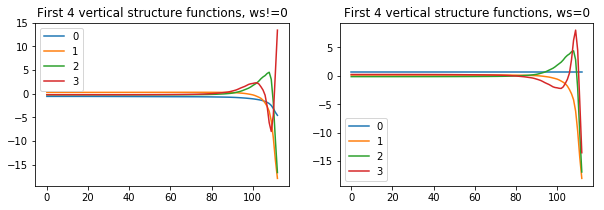

In [5]:
fig=pl.figure(figsize=(10,3))
ax=[pl.subplot(1,2,i) for i in range(1,3)]

Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
# returns the vertical structure functions, equivalent heights and output file name
ax[0].plot(Gn[:4].T);                                    
ax[0].legend(range(4))
ax[0].set_title('First 4 vertical structure functions, ws!=0')

Gn,hk,vfile=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
ax[1].plot(Gn[:4].T);
ax[1].legend(range(4))
ax[1].set_title('First 4 vertical structure functions, ws=0');

The output file (created by default and in netcdf format) includes additional variables like the pressure levels corresponding to the gaussian sigma levels, which can be used to make some plots:

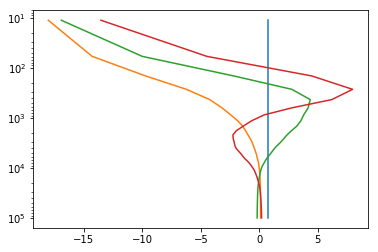

In [6]:
import netCDF4
plev=netCDF4.Dataset(vfile).variables['plev'][:]
pl.semilogy(Gn[:4].T,plev)
pl.gca().invert_yaxis()

The options regarding the output file creation are:

 - save, save output to a file, True
 - format, output file format: npz or netcdf (default)

There are other important options:
- ws0, pressure vertical velocity zero at surface, False by default
- n_leg, number of Legendre polynomials to use, len(data)+20 by default

Let us now check the contents of the output netcdf file and then test the format and ws0 options:

In [7]:
nmf3d.calcs.ncshow(vfile)


# Contents of the NetCDF file
   out_vs_ws0True.nc

:: Global Attributes:
   date           2018-04-16 23:48:58.323216                                          
   ws0            True                                                                
   n_leg          57                                                                  
   platform       Linux-3.10.0-693.11.1.el7.x86_64-x86_64-with-centos-7.4.1708-Core   
   environment    python                                                              
   version        3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
   version_scipy  0.19.1                                                              
   version_numpy  1.13.1                                                              

:: Dimensions:
   nk_max     37
   GL        113
   nlevels0   37

:: Variables:
                                    long_name                             units      shape  
   Gn     | Vertical structure functions              

In [8]:
Gn,hk,fname=nmf3d.vertical_structure.vse(T,Lev,format='npz',ws0=True)
print(hk)
print(np.load(fname).keys())

saving out_vs_ws0True.npz
[             inf   6.41440548e+03   2.78902424e+03   1.30045988e+03
   6.73503983e+02   4.02637644e+02   2.60347760e+02   1.72641016e+02
   1.24818417e+02   9.08828920e+01   6.53845605e+01   4.90581868e+01
   3.79207543e+01   2.97765454e+01   2.35242344e+01   1.86113727e+01
   1.47376884e+01   1.17108805e+01   9.31077741e+00   7.52973386e+00
   6.13734717e+00   5.04756621e+00   4.20547521e+00   3.53577676e+00
   3.00131784e+00   2.54732811e+00   2.16539123e+00   1.84416686e+00
   1.57499005e+00   1.34774250e+00   1.15765567e+00   9.99025605e-01
   8.66841142e-01   7.55206264e-01   6.60981316e-01   5.82052736e-01
   5.14712787e-01]
['Gn', 'hk', 'gamma0', 'plev', 'tprof0', 'plev0', 'ws0', 'n_leg', 'platform', 'environment', 'version', 'version_scipy', 'version_numpy']


Note that if ws0 is True, the first hk is infinite, as expected

### 3. Hough vector functions
*nmf3d.hough_functions.hvf*

Hough vector functions as described in Swarztrauber and Kasahara (1985)

Part I: The frequencies and the Hough functions are computed for zonal wave number m = 0

Part II: The frequencies and the Hough functions are computed for zonal wave numbers m > 0

Inputs:
 - equivalent heights
 - M, maximum zonal wave number used in the expansion: m=0,1,...,M
 - nLR, total number of (west) Rossby modes used in the expansion (should be even)
 - nLG , half the number of Gravity modes used in the expansion (should be even)
 - latType, latitude type: linear (default, equally spaced) or gaussian
  
The total number of the Gravity modes will be 2*nLG=nLG(east gravity)+nLG(west gravity)

Other important inputs (kargs):
  - dlat, latitude spacing if latType is linear (default is 1.5, ie, 121 points) or number of gaussian lats if latType is gaussian (default is 128, corresponding to a spectral truncature of T85)
  - save, create file [True]
  - format, file format: [nc] or npz

In [9]:
Gn,hk,vfileT=nmf3d.vertical_structure.vse(T,Lev,ws0=True)
nk=5 # number of function to keep
data_b,data_B,fb,fB=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)
hfile_bB=fb,fB # barotropic and baroclinic output files, will be needed later


# * Important *
# dlat was set to 6 because the output file will be used in the
# next step together with some ERA-Interim raw data where latitude
# spacing is 6 deg.

saving out_vs_ws0True.nc
- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH4_dlat6linear_baroclinic.nc

- HVF barotropic -
Part I
End of part I (zonal wave number zero)
Part II
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH1_dlat6linear_barotropic.nc


Note that two files (baroclinic and barotropic) are saved when hk[0] is infinite (i.e., ws0 is True in the computation of the vertical structure). If not, both modes will be in the same file. Ex.:

In [10]:
Gn,hk,vfileF=nmf3d.vertical_structure.vse(T,Lev,ws0=False)
data_b,fb=nmf3d.hough_functions.hvf(hk[:nk],M=6,nLR=8,nLG=6,dlat=6)
hfile_b=fb

saving out_vs_ws0False.nc
- HVF baroclinic -
Part I
  - Matrix C
  - Matrix D
  - Matrix E
  - Matrix F
  - Coeffs An, Bn, Cn
  - Normalized Associated Legendre Functions - M=0
  - Normalized Associated Legendre Functions - M=1
  - HVF: gravity modes
  - HVF: rossby modes
End of part I (zonal wave number zero)
Part II
  1 of 6
  - Matrix A
  - Matrix B
  - selecting freqs and coeffs
  - Associated Legendre Functions
  - spherical vector harmonics
  - HVF: gravity
  - HVF: rossby
  2 of 6
  3 of 6
  4 of 6
  5 of 6
  6 of 6
End of part II (zonal wave numbers m>0)
saving out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc


Let us take a look at the file contents:

In [11]:
nmf3d.calcs.ncshow(hfile_b,Lmax=40)
# remove the Lmax option to see te entire variables' long_name


# Contents of the NetCDF file
   out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc

:: Global Attributes:
   date           2018-04-16 23:49:08.031555              
   nk             5                                       
   platform       Linux-3.10.0-693.11.1.el7.x86_64-x86_64+
   environment    python                                  
   version        3.6.4 |Anaconda, Inc.| (default, Jan 16+
   version_scipy  0.19.1                                  
   version_numpy  1.13.1                                  

:: Dimensions:
   components_uvz                    3
   max_zonal_wave_number             6
   number_meridional_modes          20
   lat                              31
   number_equivalent_heights         5
   quarter_number_gravitical_modes   3
   half_number_rossby_modes          4
   Np1                               4

:: Variables:
                                     long_name                    units          shape      
   HOUGH_UVZ_real   | hough functions - edd

### 4. 3-D spectrum of total energy W_nlk
*nmf3d.wnlk.spectrum*

i.e., the Vertical, Fourier and Hough transforms of zonal and meridional wind, and geopotential perturbation (from the reference geopotential)
  
Inputs:
 - vfile,  equivalent heights and vertical structure functions file (output file from step 2)
 - hfile, Hough functions file (output file from step 3)
 - data: u,v,geopotential data. This must be a dictionary with fields u, v and z. Each item is a dictionary with fields lon, lat, P (pressure levels) and v (the u, v or geopotential)
 
The input files vfile and hfile can be netcdf or npz.
 
Other inputs (kargs):
 - save, create file [True]
 - format, file format: [nc] or npz

The module wnlk includes example functions to load data from ERA-Interim. The functions can be easily converted to load data from other datasets. The loading of the data will now be explained using (low space/time resolution) ERA-Interim files present in foder data.

#### i) loading data

In [12]:
import netCDF4
fu=nmf3d.datafolder+'/u_01_1979_.nc4'
fv=nmf3d.datafolder+'/v_01_1979_.nc4'
fz=nmf3d.datafolder+'/z_01_1979_.nc4'

data_u={}
data_v={}
data_z={}

# Let us start with u:
nc=netCDF4.Dataset(fu)
data_u['P']=nc.variables['lev'][:].astype('d')
data_u['lon']=nc.variables['lon'][:].astype('d')
data_u['lat']=nc.variables['lat'][:][::-1].astype('d') # reverse to have -90:90
data_u['v']=nc.variables['var131'][:][:,:,::-1,:].astype('d') # also reverse due to lat
nc.close()

# do the same thing with v (actually lon, lat and P are only needed inside data_u)
nc=netCDF4.Dataset(fv)
data_v['v']=nc.variables['var132'][:][:,:,::-1,:].astype('d') 
nc.close()

The geopotential is a bit more complex as the reference profile must be subtracted. The profile can be obtained following step 1. So let us do this first:

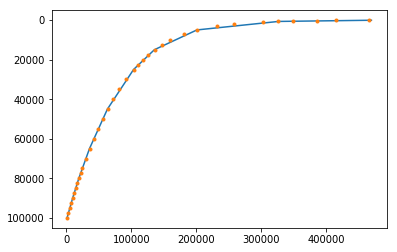

In [13]:
files=nmf3d.datafolder+'/z*'
Z,Zlev=nmf3d.calcs.profile(files,xname='lon',yname='lat',zname='lev', quiet=1)
pl.plot(Z,Zlev)
pl.gca().invert_yaxis()
Zref=Z.astype('d') # for later use

# now let's save this data for future use:
np.savetxt(nmf3d.datafolder+'/PHI_raw.txt',[Zref,Zlev])

# data folder also includes a realistic geopotential profile from ERA-Interim:
f=nmf3d.datafolder+'/PHI_ERA_I_1979_2010.txt'
z_,zlev_=np.loadtxt(f)
pl.plot(z_,zlev_,'.');

Now let us load the geopotential subtracting the reference. Note that some datasets provide not the geopotential but the geopotential height. In such case it must be divided by *g*.

In [14]:
# Load geopotential:
nc=netCDF4.Dataset(fz)
z=nc.variables['var129'][:][:,:,::-1,:].astype('d')
nc.close()

# convert from geoptential height if needed:
# z/=nmf3d.constants.g


# subtract the reference profile:
for i in range(z.shape[1]): z[:,i,:,:]-=Zref[i]

data_z['v']=z

Now we join all the data needed in a dictionary

In [15]:
data=dict(u=data_u,v=data_v,z=data_z)

A similar code is in module wnlk so that loading the data could be done simply as:

In [16]:
data=nmf3d.wnlk.load_ERA_I(fu,fv,fz,nmf3d.datafolder+'/PHI_raw.txt',height=False)

loading u : ....data/u_01_1979_.nc4
    - loading var131
loading v : ....data/v_01_1979_.nc4
    - loading var132
loading z : ....data/z_01_1979_.nc4
    - loading var129
    - subtracting reference


#### ii) 3-D spectrum
##### 1. ws0 False

In [17]:
vfile=vfileF
hfile=hfile_b
w_nlk,w_0lk,fsaveF=nmf3d.wnlk.spectrum(vfile,hfile,data,label='out_ws0_False')

 - loading parameters from Hough functions file:
    out_hvf_M6_nLR8_nLG12_NEH5_dlat6linear_ws0False.nc
 - loading vertical structure functions:
    out_vs_ws0False.nc
 - zonal wind - interpolate p to sigma
 - zonal wind - vertical transform
 - zonal wind - Fourier transform
 - meridional wind - interpolate p to sigma
 - meridional wind - vertical transform
 - meridional wind - Fourier transform
 - geopotential - interpolate p to sigma
 - geopotential - vertical transform
 - geopotential - Fourier transform
 - loading Hough vector functions
 - computing
saving out_ws0_False_wnlk.nc


An output file was created. Let's check it:

In [18]:
nmf3d.calcs.ncshow(fsaveF)


# Contents of the NetCDF file
   out_ws0_False_wnlk.nc

:: Global Attributes:
   date           2018-04-16 23:49:28.769872                                          
   platform       Linux-3.10.0-693.11.1.el7.x86_64-x86_64-with-centos-7.4.1708-Core   
   environment    python                                                              
   version        3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
   version_scipy  0.19.1                                                              
   version_numpy  1.13.1                                                              

:: Dimensions:
   number_equivalent_heights   5
   max_zonal_wave_number       6
   total_meridional_modes     20
   time                       31

:: Variables:
                             long_name                 units        shape     
   w_nlk_real | Expansion coefficients (real)       |         | (5, 6, 20, 31) |
   w_nlk_imag | Expansion coefficients (imag)       |         | (5, 6, 20, 3

##### 2. ws0 True
In this case both baroclinic and barotropic hvf files are needed.

In [19]:
vfile=vfileT
hfile=hfile_bB # two files!
w_nlk,w_0lk,fsaveT=nmf3d.wnlk.spectrum(vfile,hfile,data,label='out_ws0_True')

 - loading parameters from Hough functions file:
    out_hvf_M6_nLR8_nLG12_NEH4_dlat6linear_baroclinic.nc
 - loading vertical structure functions:
    out_vs_ws0True.nc
 - zonal wind - interpolate p to sigma
 - zonal wind - vertical transform
 - zonal wind - Fourier transform
 - meridional wind - interpolate p to sigma
 - meridional wind - vertical transform
 - meridional wind - Fourier transform
 - geopotential - interpolate p to sigma
 - geopotential - vertical transform
 - geopotential - Fourier transform
 - loading Hough vector functions
   (out_hvf_M6_nLR8_nLG12_NEH4_dlat6linear_baroclinic.nc)
   (out_hvf_M6_nLR8_nLG12_NEH1_dlat6linear_barotropic.nc)
 - computing
saving out_ws0_True_wnlk.nc


#### iii) plots/projections....

TODO

### APPENDIX
##### Matlab version

The same results of the previous Python tutorial can be obtained with the Python version of code like. In terms of output filenames, the Matlab version also saves netcdf files, but saves/loads mat instead of npz.

```
% adjust paths: ------------------------------------------------------
d='SOME_PATH/nmf3d/'
addpath([d 'nmf3d_mat']);
datafolder=[d 'data/'];

% vertical structure: ------------------------------------------------
f=[datafolder 'T_ERA_I_1979_2010.txt']
a=load(f)
T=a(1,:);
Lev=a(2,:);
[Gn,hk,vfile]=vertical_structure(T,Lev,'ws0',0);

% hough functions: ---------------------------------------------------
M=6;
nLR=8;
nLG=6;
nk=5 % number of function to keep

% ws0=1
[Gn,hk,vfileT]=vertical_structure(T,Lev,'ws0',1);
[data_b,data_B,fb,fB]=hough_functions(hk(1:nk),M,nLR,nLG,'linear','dlat',6);
hfile_bB={fb,fB};

% ws0=0
[Gn,hk,vfileF]=vertical_structure(T,Lev,'ws0',0);
[data_b,fb]=hough_functions(hk(1:nk),M,nLR,nLG,'linear','dlat',6);
hfile_b=fb;

% 3-D spectrum of total energy W_nlk ---------------------------------
fu=[datafolder 'u_01_1979_.nc4'];
fv=[datafolder 'v_01_1979_.nc4'];
fz=[datafolder 'z_01_1979_.nc4'];
fzref=[datafolder 'PHI_raw.txt'];
height=0;
data=load_ERA_I(fu,fv,fz,fzref,height);

% ws0=1
vfile=vfileT;
hfile=hfile_bB;
[w_nlk,w_0lk,fsave_w]=wnlk(vfile,hfile,data,'label','out_ws0_False');

% ws0=0
vfile=vfileF;
hfile=hfile_b;
[w_nlk,w_0lk,fsave_w]=wnlk(vfile,hfile,data,'label','out_ws0_False');
```